In [40]:
import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv('D:\\Dropbox\\GitHub\\deepstudy\\ko\\data\\train.csv')
X_test = pd.read_csv('D:\\Dropbox\\GitHub\\deepstudy\\ko\\data\\test (1).csv')
y_test = pd.read_csv('D:\\Dropbox\\GitHub\\deepstudy\\ko\\data\\y_test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.Pclass = train.Pclass.astype('category')
train.Embarked = train.Embarked.astype('category')

train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
test = pd.concat([X_test, y_test], axis=1)
test.Pclass = test.Pclass.astype('category')
test.Embarked = test.Embarked.astype('category')

test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train[['Age', 'Embarked']] = imputer.fit_transform(train[['Age', 'Embarked']])
test[['Age', 'Embarked']] = imputer.transform(test[['Age', 'Embarked']])

In [16]:
add_train = pd.get_dummies(train[['Pclass', 'Sex', 'Embarked']])
add_test = pd.get_dummies(test[['Pclass', 'Sex', 'Embarked']])

train = pd.concat([train, add_train], axis=1)
test = pd.concat([test, add_test], axis=1)

train.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)
test.drop(['Pclass', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [18]:
X = train.drop('Survived', axis = 1)
y = train.Survived

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y ,test_size = 0.2, random_state=2023)

In [19]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(712, 12) (179, 12) (712,) (179,)


In [65]:
model = models.Sequential()
model.add(layers.Dense(300, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))

# see model
model.summary()

# compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# save best model
checkpoint = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', verbose = 1,
                            save_best_only=True, model = 'max')



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 300)               3900      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 301       
                                                                 
Total params: 94,501
Trainable params: 94,501
Non-trainable params: 0
_________________________________________________________________


In [66]:
X_train.Age = X_train.Age.astype('float32')
X_train.Fare = X_train.Fare.astype('float32')
X_val.Age = X_val.Age.astype('float32')
X_val.Fare = X_val.Fare.astype('float32')

In [67]:
# train model
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32, validation_data = (X_val, y_val),
                    callbacks = [checkpoint])

Epoch 1/500
18/23 [======================>.......] - ETA: 0s - loss: 1.0896 - accuracy: 0.6215 
Epoch 1: val_loss improved from inf to 0.90493, saving model to best_model.h5
23/23 [==============================] - 1s 15ms/step - loss: 1.1098 - accuracy: 0.6138 - val_loss: 0.9049 - val_accuracy: 0.6927
Epoch 2/500
17/23 [=====================>........] - ETA: 0s - loss: 0.8187 - accuracy: 0.6618
Epoch 2: val_loss improved from 0.90493 to 0.75643, saving model to best_model.h5
23/23 [==============================] - 0s 6ms/step - loss: 0.8728 - accuracy: 0.6615 - val_loss: 0.7564 - val_accuracy: 0.6983
Epoch 3/500
16/23 [===================>..........] - ETA: 0s - loss: 0.8422 - accuracy: 0.6641
Epoch 3: val_loss improved from 0.75643 to 0.62668, saving model to best_model.h5
23/23 [==============================] - 0s 6ms/step - loss: 0.8413 - accuracy: 0.6629 - val_loss: 0.6267 - val_accuracy: 0.6592
Epoch 4/500
13/23 [===============>..............] - ETA: 0s - loss: 0.7051 - accura

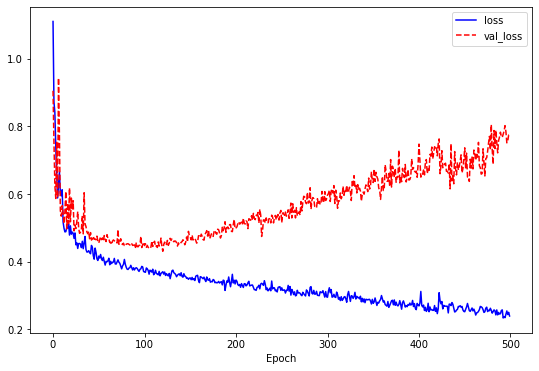

In [68]:
# plot loss
plt.figure(figsize=(9, 6))
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [69]:
# call best model
from keras.models import load_model

best_model = load_model('best_model.h5')
best_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 300)               3900      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 301       
                                                                 
Total params: 94,501
Trainable params: 94,501
Non-trainable params: 0
_________________________________________________________________


In [70]:
X_test = test.drop('Survived', axis = 1)
y_test = test.Survived
X_test.Age = X_test.Age.astype('float32')

In [71]:
# predict
y_pred = model.predict(X_test)
y_pred


14/14 [==============================] - 0s 1ms/step


array([[7.33372569e-02],
       [4.28942731e-05],
       [4.52859538e-12],
       [1.09929897e-01],
       [9.33952749e-01],
       [7.54556209e-02],
       [1.25694469e-01],
       [3.43193533e-03],
       [9.99977708e-01],
       [1.75230380e-04],
       [4.07002196e-02],
       [5.63496530e-01],
       [9.99999940e-01],
       [4.28320542e-02],
       [9.99998152e-01],
       [9.96273994e-01],
       [1.28876290e-03],
       [4.47726339e-01],
       [6.08226433e-02],
       [8.64734320e-05],
       [9.07268524e-01],
       [9.03001547e-01],
       [9.99978423e-01],
       [6.80799663e-01],
       [6.35340154e-01],
       [3.33519615e-02],
       [9.99946952e-01],
       [1.71090886e-01],
       [5.32501340e-01],
       [2.03392841e-03],
       [3.54171731e-03],
       [6.54456764e-03],
       [3.46447885e-01],
       [5.09664975e-03],
       [7.95096457e-01],
       [9.91537631e-01],
       [6.01053476e-01],
       [4.55638289e-01],
       [1.61755700e-02],
       [7.29876995e-01],


In [72]:
result = np.where(y_pred > 0.5, 1, 0)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.8301435406698564